# 最小二乗分類
ガウスカーネルに対する最小二乗回帰を応用した多クラス分類．  
2クラス分類を複数回繰り返して多クラス分類を実現する．  
1対他法と1対1法がある．  
./digit 以下の数字データファイルを読み込む．  

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

### データ読み込み
./digit 以下には20個の各数字データファイル*(train / test)があり，それぞれ500個ずつの数字データが入っている．  
train_data 5000個を全て使うと非常に計算が重くなったので2000データのみを使った．  

In [2]:
#dataは2次元　(データ数 x 次元数256)． 上から0,1,2,,,と並んでいる
train_num = 2000 #使うデータ数
test_num = 2000

train_data = np.zeros((train_num, 256))
train_label = np.zeros(train_num)
test_data = np.zeros((test_num, 256))
test_label = np.zeros(test_num)
for i in range(10):
    train_data[int(train_num/10*i): int(train_num/10*(i+1)), :] = np.loadtxt('digit/digit_train{}.csv'.format(i) ,dtype="float", delimiter=",")[:int(train_num/10)]
    train_label[int(train_num/10*i): int(train_num/10*(i+1))] = i
    test_data[int(test_num/10*i): int(test_num/10*(i+1)), :] = np.loadtxt('digit/digit_test{}.csv'.format(i) ,dtype="float", delimiter=",")[:int(test_num/10)]
    test_label[int(test_num/10*i): int(test_num/10*(i+1))] = i

In [3]:
#matrix生成
def design_mat(x1, x2, h):
    return np.exp(-np.sum((x1[:, None] - x2[None]) ** 2, axis=-1) / (2 * h ** 2))

In [4]:
#θの予測
def optimize(k, y, l):
    return np.linalg.solve(k.T.dot(k) + l * np.identity(len(y)), k.T.dot(y))

In [5]:
#結果(confusion matrix)の表示
def confusion_mat(pred, ans):
    cmx_data = confusion_matrix(ans, pred, labels=[0,1,2,3,4,5,6,7,8,9])
    print(cmx_data)
    df_cmx = pd.DataFrame(cmx_data, index=[0,1,2,3,4,5,6,7,8,9], columns=[0,1,2,3,4,5,6,7,8,9])

    plt.figure(figsize = (10,7))
    sns.heatmap(df_cmx, annot=True)
    plt.show()

### 1対他法
1つのクラスをターゲットとしそれ以外のクラスと２値分類する．クラス数をcとしてc回の2値分類問題を解く．  
最終的にはc個の識別関数のうち最大値を与える関数に対応するクラスを予測クラスとする．  

In [7]:
# データ取得．全データを使い，指定のクラスとそれ以外でラベルを分ける
def get_data_1to9(data, idx):
    y = np.ones(train_num)*-1
    y[int(train_num/10)*idx: int(train_num/10)*(idx+1)] = 1
    return data, y

count :  0
count :  1
count :  2
count :  3
count :  4
count :  5
count :  6
count :  7
count :  8
count :  9
accuracy :  0.9355
[[196   0   1   0   0   0   3   0   0   0]
 [  0 199   1   0   0   0   0   0   0   0]
 [  1   0 179   4   9   0   0   3   4   0]
 [  0   0   0 186   0   8   0   2   4   0]
 [  0   2   0   0 185   0   3   0   2   8]
 [  4   0   1   8   2 181   1   0   0   3]
 [  2   0   2   0   1   2 193   0   0   0]
 [  0   2   0   0   2   0   0 189   0   7]
 [  2   1   1   6   2   7   0   0 180   1]
 [  0   3   0   0   6   0   0   6   2 183]]


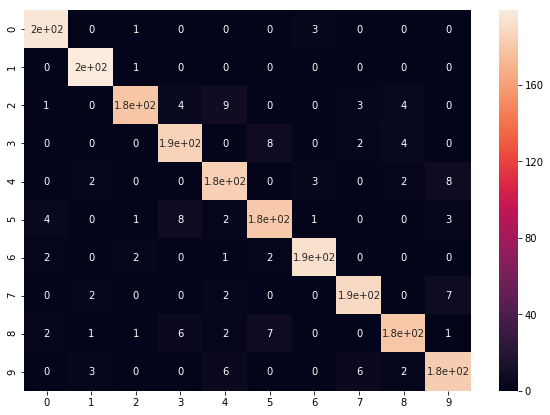

In [9]:
pred_list = np.zeros((10,test_num))
for i in range(10):
    print('count : ',i)
    x, y = get_data_1to9(train_data, i)
    k = design_mat(x, x, 10.)
    theta = optimize(k, y, 1.)  # 予測関数のパラメータを最適化
    k_test = design_mat(x, test_data, 10.)
    pred_list[i] = k_test.T.dot(theta).T  #テストデータがそのクラスかどうかを予測
    
pred_list = np.argmax(pred_list,axis=0)  # 最大値を示した関数のクラスを正解とする
#print(pred_list)
accuracy = np.mean(pred_list == test_label)
print('accuracy : ', accuracy)
confusion_mat(pred_list, test_label)

### 1対1法
2つの数字の組み合わせそれぞれについて２値分類する．クラス数をcとしてc(c-1)/2 回の2値分類問題を解く．  
最終的にはデータを全ての関数に入力し，予測クラスを投票して多数決で決める．  

In [10]:
# データ取得．指定した２クラスのデータを取得
def get_data_1to1(data, idx1, idx2):
    x = np.array([data[i] for i in range(train_num) if int(train_num/10)*idx1 <= i<int(train_num/10)*(idx1+1) or int(train_num/10)*idx2 <= i<int(train_num/10)*(idx2+1)])
    y = np.ones(int(train_num/10)*2)
    y[int(train_num/10):] = -1
    return x, y

count :  0
count :  1
count :  2
count :  3
count :  4
count :  5
count :  6
count :  7
count :  8
count :  9
count :  10
count :  11
count :  12
count :  13
count :  14
count :  15
count :  16
count :  17
count :  18
count :  19
count :  20
count :  21
count :  22
count :  23
count :  24
count :  25
count :  26
count :  27
count :  28
count :  29
count :  30
count :  31
count :  32
count :  33
count :  34
count :  35
count :  36
count :  37
count :  38
count :  39
count :  40
count :  41
count :  42
count :  43
count :  44
accuracy :  0.947
[[195   0   2   0   0   0   2   0   1   0]
 [  0 199   0   0   0   1   0   0   0   0]
 [  0   0 187   3   6   0   0   1   2   1]
 [  0   0   1 190   0   5   0   1   3   0]
 [  0   0   0   0 193   1   2   0   0   4]
 [  3   0   1   8   2 182   1   0   0   3]
 [  2   0   2   0   1   2 193   0   0   0]
 [  0   0   1   0   6   0   0 187   1   5]
 [  1   0   1   5   5   6   0   1 177   4]
 [  0   1   0   0   2   0   0   5   1 191]]


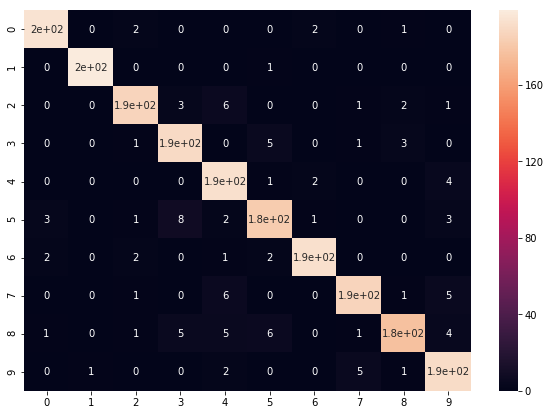

In [11]:
pred_list = np.zeros((45,test_num))
idx_list = np.empty((0,2), int)
count = 0  # 予測関数のindex(0〜44)
for i in range(10):
    for j in range(10):
        if i>=j:
            continue
        print('count : ',count)
        idx_list = np.append(idx_list, np.array([[i,j]]), axis=0)  # 重複のないクラスの組
        x, y = get_data_1to1(train_data, i, j)
        k = design_mat(x, x, 10.)
        theta = optimize(k, y, 1.)  # 予測関数のパラメータを最適化

        k_test = design_mat(x, test_data, 10.)
        pred_list[count] = k_test.T.dot(theta).T  # テストデータがどちらのクラスかの予測値
        count += 1

pred_final = np.zeros((10,test_num))
for i in range(45):
    tr = (pred_list[i] > 0)
    fl = (pred_list[i] < 0)
    pred_final[idx_list[i,0], tr] += 1  # 0以上なら始めのindexのクラス，０以下ならもう一方のクラスに投票
    pred_final[idx_list[i,1], fl] += 1

pred_final = np.argmax(pred_final,axis=0)  # 最大得票のクラスを予測とする
#print(pred_final) 
accuracy = np.mean(pred_final == test_label)
print('accuracy : ', accuracy)
confusion_mat(pred_final, test_label)

1対他法は入力するデータのアンバランスが激しい，1対1法は計算するパターンが多いという欠点がある．  
今回のような数字データではどちらもかなり高い正答率を示しており性能に大きな差がないため，
計算時間の短い1対他法を使うのが適切と考えられる．  